In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import h5py
import datetime
from scipy.optimize import curve_fit
params = {'font.size':20,'font.family':'lmodern','xtick.labelsize':20, 'ytick.labelsize':20,}
plt.rcParams.update(params)

In [59]:

# for x in ['20211102_SiPM_DF-on_MF-5_VSD-1s']:
for x in ['20211102_SiPM_DF-on_MF-5_VSD-1s_3']:
    file = h5py.File('C:/Data/SiPM/FBK-HD3/{}.h5'.format(x), 'r')
    data_all = []
    voltage = 0 
    for ii,group in enumerate(file.keys()):
        
        current = file[group]['Current'][:]
        if len(current)==1:
            continue
        if ii==0:
            voltage = file[group]['Voltage'][:]
        data_all.append(np.array(current))
    file.close()

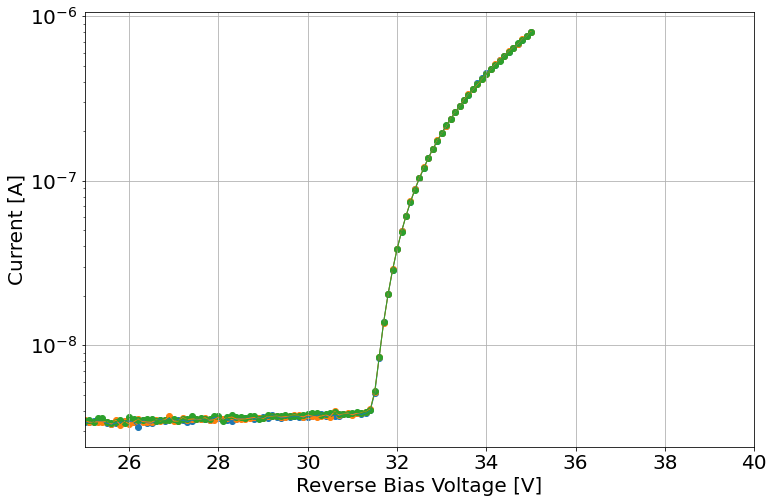

In [60]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Reverse Bias Voltage [V]')
plt.ylabel('Current [A]')
plt.yscale('log')
plt.grid()
plt.xlim(25,40)

for x in data_all:
    plt.plot(voltage, x, lw=1)
    plt.scatter(voltage, x, lw=1)

plt.show()

<ipython-input-61-c5ee349ce626>:14: RuntimeWarning: divide by zero encountered in log
  grad_i =  np.gradient(np.log(current))


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

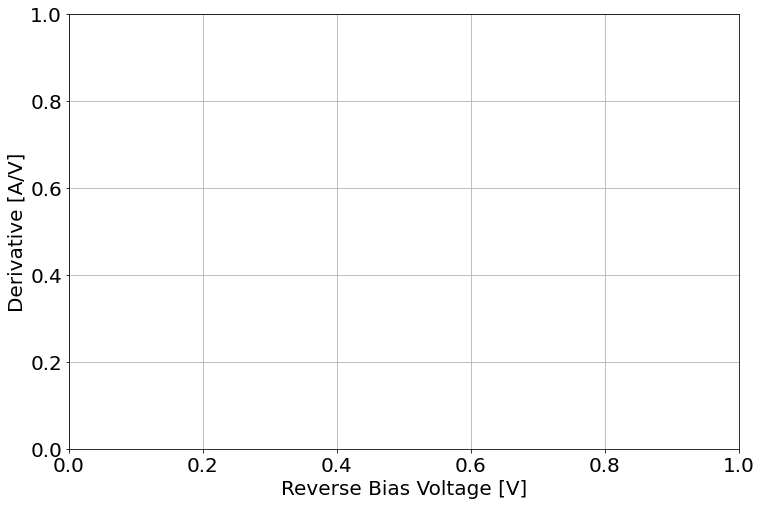

In [61]:
fig = plt.figure(figsize=(12,8))
plt.xlabel('Reverse Bias Voltage [V]')
plt.ylabel('Derivative [A/V]')
plt.grid()

def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))


breakdown = []

for x in data_all:
    grad_v = np.gradient(voltage)
    grad_i =  np.gradient(np.log(current))
    plt.plot(voltage, grad_i/grad_v)
    plt.scatter(voltage, grad_i/grad_v)

    min_x = 0
    max_x = 32.5
    cut = np.where((voltage<max_x)&(voltage>min_x))[0]
    popt,pcov = curve_fit(gauss, grad_v[cut], grad_i[cut], p0=[np.max(grad_i/grad_v), voltage[np.where(grad_i/grad_v==np.max(grad_i/grad_v))][0], 0.1], maxfev=10 )

    xfit = np.linspace(min_x, max_x, 1000)
    plt.plot(xfit, gauss(xfit, *popt))

    breakdown.append(popt[1])
    print(popt[1])

plt.xlim(25,40)
plt.ylim(ymin=0)

plt.show()